In [1]:
!pip install scipy scikit-learn pulp matplotlib_venn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ 三门都及格： []
✅ 至少一门及格： ['小刚', '小张', '小明', '小李', '小红', '小芳']
✅ 只通过数学： ['小明']
✅ 只通过英语： []
✅ 只通过语文： ['小张']
✅ 两门及格（数学+英语）： ['小红', '小芳']
✅ 两门及格（数学+语文）： ['小刚']
✅ 两门及格（英语+语文）： ['小李']
❌ 三门都没及格： ['小林', '小陈']


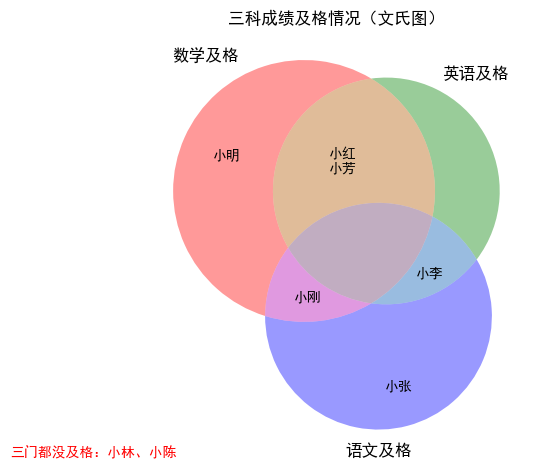

In [2]:
## 项目1：集合操作与成绩分析
 # 背景说明：
 # 某班同学的数学和英语成绩已经评出，老师希望找出：
 # 同时及格的学生（交集）
 # 至少一门及格的学生（并集）
 # 只通过数学但英语没及格的学生（差集）
 # 两门都没及格的学生（补集）

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 可用 'SimHei'，Mac 可用 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 全体学生
all_students = {'小明', '小红', '小刚', '小芳', '小李', '小张', '小陈', '小林'}

# 各科及格名单
math_pass = {'小明', '小红', '小刚', '小芳'}
english_pass = {'小红', '小芳', '小李'}
chinese_pass = {'小刚', '小李', '小张'}

# 集合运算
three_pass = math_pass & english_pass & chinese_pass
at_least_one = math_pass | english_pass | chinese_pass
only_math = math_pass - (english_pass | chinese_pass)
only_english = english_pass - (math_pass | chinese_pass)
only_chinese = chinese_pass - (math_pass | english_pass)
fail_all = all_students - at_least_one

# 两门及格（去除三门全过）
math_eng = (math_pass & english_pass) - three_pass
math_chi = (math_pass & chinese_pass) - three_pass
eng_chi = (english_pass & chinese_pass) - three_pass

# 输出（排序后更清晰）
print("✅ 三门都及格：", sorted(three_pass))
print("✅ 至少一门及格：", sorted(at_least_one))
print("✅ 只通过数学：", sorted(only_math))
print("✅ 只通过英语：", sorted(only_english))
print("✅ 只通过语文：", sorted(only_chinese))
print("✅ 两门及格（数学+英语）：", sorted(math_eng))
print("✅ 两门及格（数学+语文）：", sorted(math_chi))
print("✅ 两门及格（英语+语文）：", sorted(eng_chi))
print("❌ 三门都没及格：", sorted(fail_all))

# ========================
# venn3 可视化图像
# ========================
plt.figure()
venn = venn3(
    [math_pass, english_pass, chinese_pass],
    set_labels=('数学及格', '英语及格', '语文及格')
)

# 标注每个区域
venn.get_label_by_id('100').set_text('\n'.join(sorted(only_math)))
venn.get_label_by_id('010').set_text('\n'.join(sorted(only_english)))
venn.get_label_by_id('001').set_text('\n'.join(sorted(only_chinese)))
venn.get_label_by_id('110').set_text('\n'.join(sorted(math_eng)))
venn.get_label_by_id('101').set_text('\n'.join(sorted(math_chi)))
venn.get_label_by_id('011').set_text('\n'.join(sorted(eng_chi)))
venn.get_label_by_id('111').set_text('\n'.join(sorted(three_pass)))

# 标注补集（图外显示）
plt.text(-1.2, -0.8, f"三门都没及格：" + '、'.join(sorted(fail_all)), fontsize=10, color='red')

plt.title("三科成绩及格情况（文氏图）")
plt.tight_layout()
plt.show()

最优解：
应生产产品 A 数量 x = 40.00, 应生产产品 B 数量 y = 20.00
最大利润 Z = 2200.00


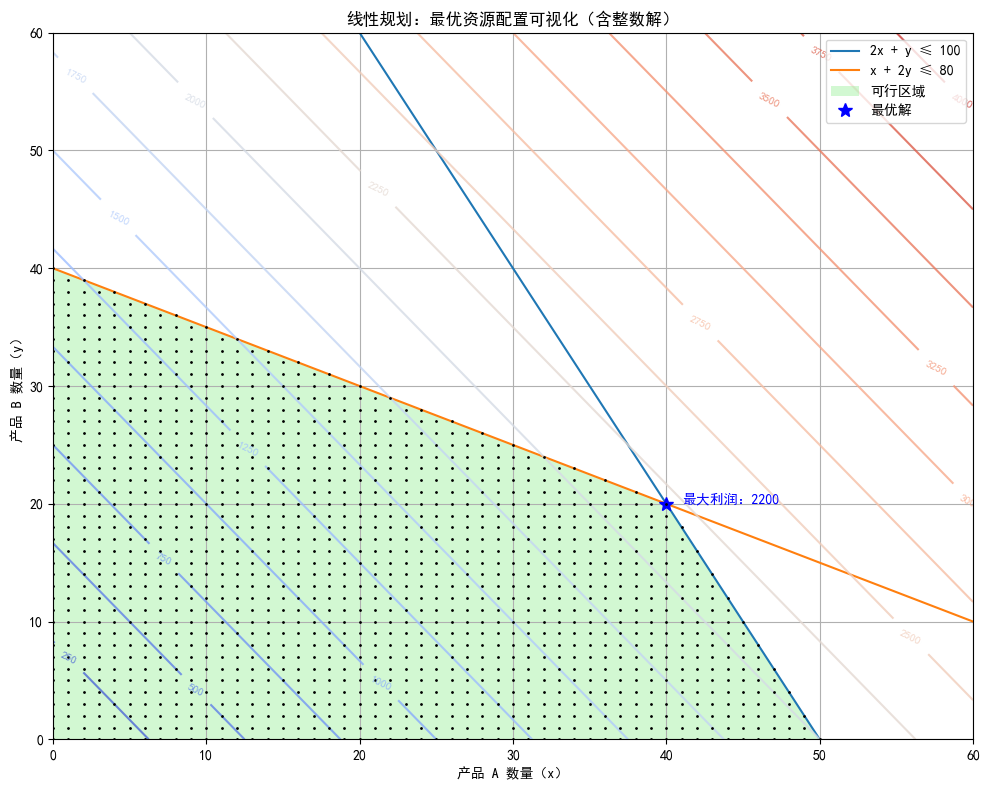

In [3]:
## 项目2：不等式与最优资源分配（线性规划）
 # 背景说明：
 # 假设一个工厂生产两种产品 A 和 B：
 # 每个 A 产品消耗2小时机器时间、1小时人工；每个 B 产品消耗1小时机器时间、2小时人工；
 # 每天最多有 100 小时机器时间，80 小时人工；每个 A 产品利润为 40 元，B 为 30 元。
 # 目标：在不超过资源限制的情况下，如何配置A、B产品数量，使得最大化总利润。

import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.spatial import ConvexHull

# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 可用 'SimHei'，Mac 可用 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 定义约束（Ax + By <= C）
constraints = [
    [2, 1, 100],   # 2x + y <= 100
    [1, 2, 80],    # x + 2y <= 80
    [-1, 0, 0],    # -x <= 0  -> x >= 0
    [0, -1, 0],    # -y <= 0  -> y >= 0
]

# 求所有约束线的交点，并判断是否为可行解
def get_intersection(c1, c2):
    A = np.array([c1[:2], c2[:2]])
    b = np.array([c1[2], c2[2]])
    try:
        p = np.linalg.solve(A, b)
        if np.all(np.isfinite(p)):
            return p
    except np.linalg.LinAlgError:
        return None
    return None

# 检查点是否满足所有约束
def is_feasible(p):
    return all(a * p[0] + b * p[1] <= c + 1e-6 for a, b, c in constraints)

# 获取所有可行交点
points = []
for c1, c2 in combinations(constraints, 2):
    p = get_intersection(c1, c2)
    if p is not None and is_feasible(p):
        points.append(p)

points = np.array(points)
x_vals, y_vals = points[:, 0], points[:, 1]

# 目标函数 Z = 40x + 30y
profits = 40 * x_vals + 30 * y_vals
max_idx = np.argmax(profits)
best_point = points[max_idx]
best_profit = profits[max_idx]

# =========================
# 可视化图像
# =========================
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(0, 60, 400)
y1 = (100 - 2 * x)
y2 = (80 - x) / 2

# 添加约束线
ax.plot(x, y1, label='2x + y ≤ 100')
ax.plot(x, y2, label='x + 2y ≤ 80')

# 填充可行域
if len(points) >= 3:
    hull = ConvexHull(points)
    polygon = points[hull.vertices]
    path = Path(polygon)
    patch = PathPatch(path, facecolor='lightgreen', lw=0, alpha=0.4, label='可行区域')
    ax.add_patch(patch)

# 添加目标函数等值线
Z = lambda x, y: 40 * x + 30 * y
X, Y = np.meshgrid(np.linspace(0, 60, 200), np.linspace(0, 60, 200))
Z_vals = Z(X, Y)
contours = ax.contour(X, Y, Z_vals, levels=16, cmap='coolwarm', alpha=0.8)
ax.clabel(contours, inline=True, fontsize=8)

# 标记最优解
ax.plot(best_point[0], best_point[1], 'b*', markersize=10, label='最优解')
ax.text(best_point[0]+1, best_point[1], f'最大利润：{best_profit:.0f}', fontsize=10, color='blue')

# 枚举可行区域内所有整数解并标注
for xi in range(61):  # x 从 0 到 60
    for yi in range(61):  # y 从 0 到 60
        if is_feasible((xi, yi)):
            z = 40 * xi + 30 * yi
            ax.plot(xi, yi, 'k.', markersize=2)  # 用小黑点标记
            # 显示利润值（可选）
            # ax.text(xi, yi, f'{z:.0f}', fontsize=6, color='gray', alpha=0.5)

# 输出最优解
print("最优解：")
print(f"应生产产品 A 数量 x = {best_point[0]:.2f}, 应生产产品 B 数量 y = {best_point[1]:.2f}")
print(f"最大利润 Z = {best_profit:.2f}")

ax.set_xlim(0, 60)
ax.set_ylim(0, 60)
ax.set_xlabel('产品 A 数量（x）')
ax.set_ylabel('产品 B 数量（y）')
ax.set_title('线性规划：最优资源配置可视化（含整数解）')
ax.legend(loc='upper right')
ax.grid(True)
plt.tight_layout()
plt.savefig('linear_programming.png', format='png', dpi=900)  # 保存图像
plt.show()

拟合函数: y = 99.77 * exp(-0.10 * x)
参数含义说明：a = 初始容量（99.77），b = 衰减速率（-0.0991），应为负值表示衰减
参数标准误差: a ± 0.1312，b ± 0.0003
拟合R²得分：0.9999，R²越接近1拟合效果越好

未来预测：
预测 11 小时电池容量：33.54%
预测 12 小时电池容量：30.38%
预测 13 小时电池容量：27.51%
预测 14 小时电池容量：24.92%

提示：大约在第 17 小时后，电池容量降至约 18.51%，可能已不可用


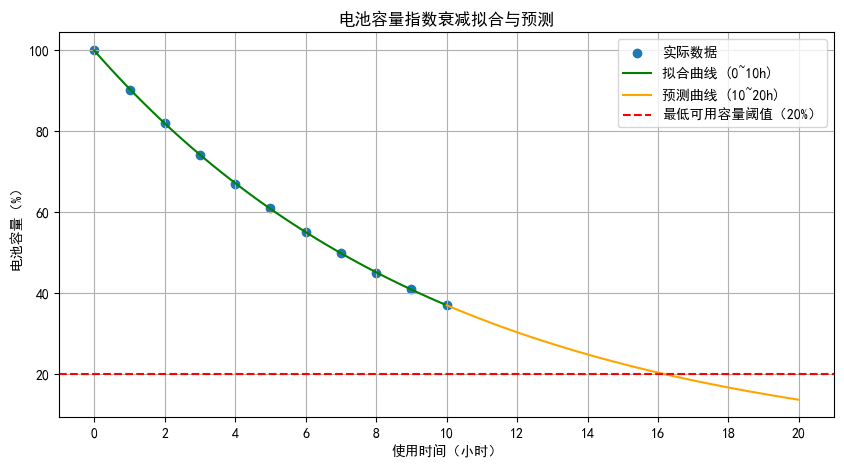

In [4]:
## 项目3：数据分析与函数拟合（以电池寿命预测为例）
 # 背景说明：
 # 某型号电池的使用时间与剩余容量的关系数据（模拟数据），希望用指数衰减函数进行拟合，预测未来使用周期的容量变化趋势。

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# 设置中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 可用 'SimHei'，Mac 可用 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 模拟：时间（单位：小时）和电池容量（%）
x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([100, 90, 82, 74, 67, 61, 55, 50, 45, 41, 37])

# 拟合函数：指数衰减模型 y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)

# 使用curve_fit进行曲线拟合，返回拟合参数params和协方差矩阵cov
params, cov = curve_fit(exp_func, x_data, y_data)
a, b = params
perr = np.sqrt(np.diag(cov))  # 参数的标准误差

# 输出拟合函数及参数解释
print(f"拟合函数: y = {a:.2f} * exp({b:.2f} * x)")
print(f"参数含义说明：a = 初始容量（{a:.2f}），b = 衰减速率（{b:.4f}），应为负值表示衰减")
print(f"参数标准误差: a ± {perr[0]:.4f}，b ± {perr[1]:.4f}")

# 拟合效果评估：计算R²（决定系数、拟合优度）
y_fit_eval = exp_func(x_data, a, b)
r2 = r2_score(y_data, y_fit_eval)
print(f"拟合R²得分：{r2:.4f}，R²越接近1拟合效果越好")

# 拟合曲线（0~10小时）
x_fit = np.linspace(0, 10, 100)
y_fit = exp_func(x_fit, a, b)

# 预测区间（10~20小时）
x_pred = np.linspace(10, 20, 100)
y_pred = exp_func(x_pred, a, b)

# 预测输出
print("\n未来预测：")
for hour in [11, 12, 13, 14]:
    cap = exp_func(hour, a, b)
    print(f"预测 {hour} 小时电池容量：{cap:.2f}%")

# 找出接近 20% 的时间点
threshold = 20
for h in range(10, 20):
    if exp_func(h, a, b) <= threshold:
        critical_hour = h
        break
print(f"\n提示：大约在第 {critical_hour} 小时后，电池容量降至约 {exp_func(critical_hour, a, b):.2f}%，可能已不可用")

# =========================
# 可视化图像
# =========================
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, label='实际数据')
plt.plot(x_fit, y_fit, label='拟合曲线 (0~10h)', color='green')
plt.plot(x_pred, y_pred, label='预测曲线 (10~20h)', color='orange')

# 添加最低可用容量阈值线（20%）
plt.axhline(y=20, color='red', linestyle='--', label='最低可用容量阈值（20%）')

plt.xticks(np.arange(0, 21, 2))
plt.xlabel('使用时间（小时）')
plt.ylabel('电池容量（%）')
plt.title('电池容量指数衰减拟合与预测')
plt.legend()
plt.grid(True)
plt.savefig('battery_fitting.png', format='png', dpi=900)  # 保存图像
plt.show()

拟合函数：y = A * cos(Bx + C) + D
拟合参数：A = -2.63（振幅，白昼最大变动范围）
          B = 0.91（周期因子，约为1表示一年一个周期）
          C = 0.76（相位偏移，决定最高点出现在几月）
          D = 11.75（平均昼长）
拟合R²得分：0.9815，R²越接近1拟合效果越好

未来12个月预测：
第 13 月（跨年预测）昼长：9.18 小时
第 14 月（跨年预测）昼长：9.71 小时
第 15 月（跨年预测）昼长：10.70 小时
第 16 月（跨年预测）昼长：11.93 小时
第 17 月（跨年预测）昼长：13.11 小时
第 18 月（跨年预测）昼长：14.00 小时
第 19 月（跨年预测）昼长：14.38 小时
第 20 月（跨年预测）昼长：14.17 小时
第 21 月（跨年预测）昼长：13.43 小时
第 22 月（跨年预测）昼长：12.30 小时
第 23 月（跨年预测）昼长：11.06 小时
第 24 月（跨年预测）昼长：9.97 小时


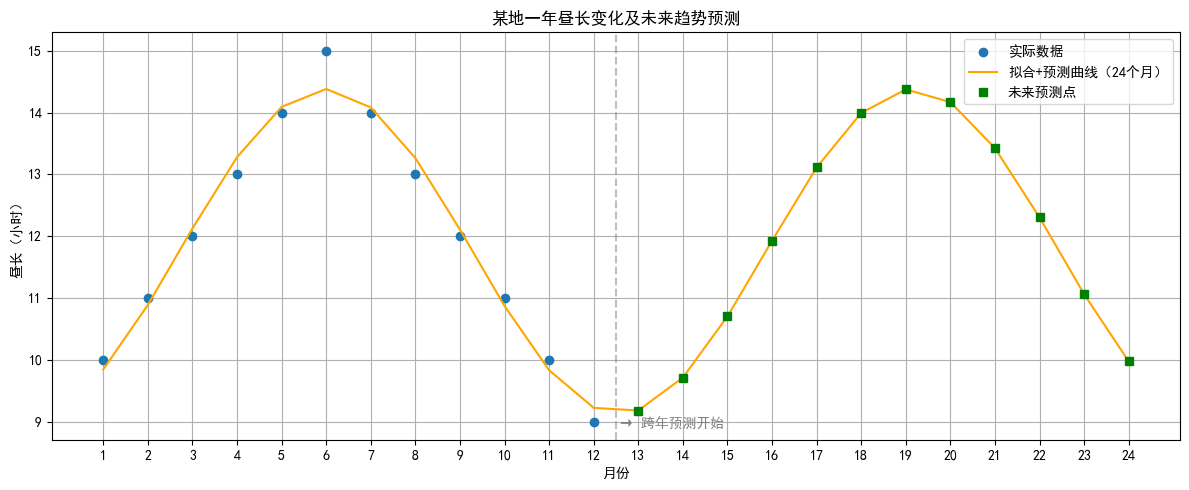

In [5]:
## 项目4：三角函数与周期现象建模（以昼长变化为例）
 # 背景说明：
 # 一年中每天的白天时长是周期变化的，约可以用三角函数模拟。以下是模拟某地一年中每月平均昼长（小时），
 # 试拟合一个余弦模型并预测未来趋势。

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams
from sklearn.metrics import r2_score

# 设置中文字体支持
plt.rcParams['font.family'] = 'SimHei'  # Windows 可用 'SimHei'，Mac 可用 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 模拟数据：月份（映射到角度0~2π）与平均昼长（小时）
months = np.arange(1, 13)
x = (months - 1) * 2 * np.pi / 12
day_length = np.array([10, 11, 12, 13, 14, 15, 14, 13, 12, 11, 10, 9])

# 拟合函数：余弦模型 y = A * cos(B * x + C) + D
def cos_func(x, A, B, C, D):
    return A * np.cos(B * x + C) + D

# 使用curve_fit进行曲线拟合，返回拟合参数params
params, _ = curve_fit(cos_func, x, day_length)
A, B, C, D = params

# 输出拟合函数及参数解释
print(f"拟合函数：y = A * cos(Bx + C) + D")
print(f"拟合参数：A = {A:.2f}（振幅，白昼最大变动范围）")
print(f"          B = {B:.2f}（周期因子，约为1表示一年一个周期）")
print(f"          C = {C:.2f}（相位偏移，决定最高点出现在几月）")
print(f"          D = {D:.2f}（平均昼长）")

# 拟合效果评估：计算R²（决定系数、拟合优度）
y_fit_eval = cos_func(x, A, B, C, D)
r2 = r2_score(day_length, y_fit_eval)
print(f"拟合R²得分：{r2:.4f}，R²越接近1拟合效果越好")

# 拟合曲线（1~12月） + 预测未来（13~24月）
months_all = np.arange(1, 25)
x_all = (months_all - 1) * 2 * np.pi / 12
y_pred = cos_func(x_all, A, B, C, D)

# 输出未来12个月预测结果
print("\n未来12个月预测：")
for i in range(12, 24):
    print(f"第 {months_all[i]} 月（跨年预测）昼长：{y_pred[i]:.2f} 小时")

# =========================
# 可视化图像
# =========================
plt.figure(figsize=(12, 5))
plt.plot(months, day_length, 'o', label='实际数据')
plt.plot(months_all, y_pred, '-', color='orange', label='拟合+预测曲线（24个月）')
plt.axvline(x=12.5, color='gray', linestyle='--', alpha=0.5)
plt.text(12.6, min(y_pred)-0.3, '→ 跨年预测开始', color='gray')

# 额外标注预测点
plt.plot(months_all[12:], y_pred[12:], 's', color='green', label='未来预测点')

plt.xticks(np.arange(1, 25, 1))
plt.xlabel('月份')
plt.ylabel('昼长（小时）')
plt.title('某地一年昼长变化及未来趋势预测')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

最佳模型: 双指数+幂函数
最佳模型参数: [ 6.28060350e+01  5.51940829e-02 -4.42491113e+04  1.54157629e-04
  4.42151185e+04  1.60614651e-05]


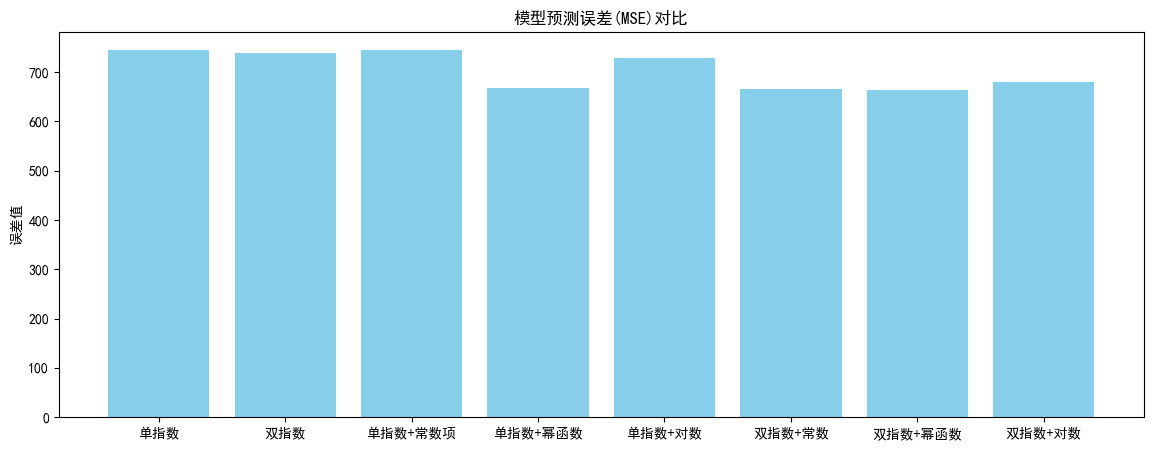

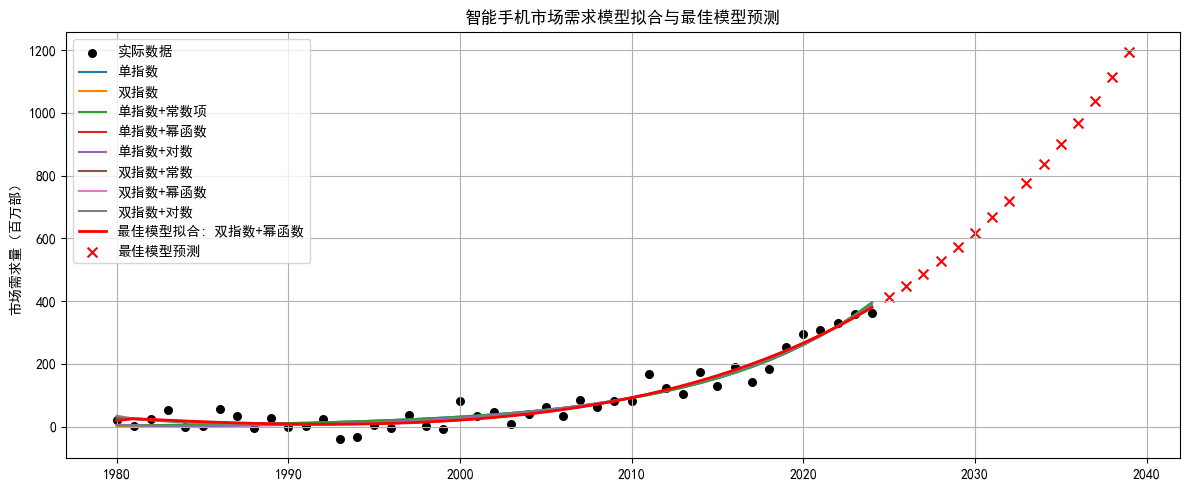

In [6]:
## 项目5：基本初等函数应用（智能手机市场需求预测）
 # 背景说明：
 # 基于1980年至2024年的模拟销量数据，利用指数函数、对数函数、幂函数等基本初等函数模型
 # 对市场需求进行拟合与评估，进一步预测未来15年（2025-2040）的市场发展趋势。

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# 设置中文字体支持
plt.rcParams['font.family'] = 'SimHei'  # Windows 可用 'SimHei'，Mac 可用 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 生成模拟市场需求数据集
np.random.seed(42)
years = np.arange(1980, 2025)                        # 1980-2025年的数据
base_sales = np.exp(0.1 * (years - 1980)) * 5        # 指数增长趋势
noise = np.random.normal(scale=30, size=len(years))  # 添加噪声
sales = base_sales + noise                           # 叠加噪声后的数据

# 定义拟合模型
def exp_func1(x, a, b):                              # 单指数模型
    return a * np.exp(b * (x - 1980))

def exp_func2(x, a, b, c, d):                        # 双指数模型
    return a * np.exp(b * (x - 1980)) + c * np.exp(d * (x - 1980))

def exp_func3(x, a, b, c):                           # 单指数 + 常数项
    return a * np.exp(b * (x - 1980)) + c

def exp_func4(x, a, b, c, d):                        # 单指数 + 幂函数
    return a * np.exp(b * (x - 1980)) + c * ((x - 1980 + 1e-6) ** d)

def exp_func5(x, a, b, c):                           # 单指数 + 对数函数（避免log(0)）
    return a * np.exp(b * (x - 1980)) + c * np.log(x - 1979)

def exp_func6(x, a, b, c, d, e):                     # 双指数 + 常数项
    return a * np.exp(b * (x - 1980)) + c * np.exp(d * (x - 1980)) + e

def exp_func7(x, a, b, c, d, e, f):                  # 双指数 + 幂函数（修正除零）
    return a * np.exp(b * (x - 1980)) + c * np.exp(d * (x - 1980)) + e * ((x - 1980 + 1e-6) ** f)

def exp_func8(x, a, b, c, d, e):                     # 双指数 + 对数函数
    return a * np.exp(b * (x - 1980)) + c * np.exp(d * (x - 1980)) + e * np.log(x - 1979)

# 需要拟合的模型
models = {
    "单指数": exp_func1,
    "双指数": exp_func2,
    "单指数+常数项": exp_func3,
    "单指数+幂函数": exp_func4,
    "单指数+对数": exp_func5,
    "双指数+常数": exp_func6,
    "双指数+幂函数": exp_func7,
    "双指数+对数": exp_func8
}

# 初始（经验）参数
p0_dict = {
    "单指数": [5, 0.1],
    "双指数": [5, 0.1, 2, 0.05],
    "单指数+常数项": [5, 0.1, 10],
    "单指数+幂函数": [5, 0.1, 1, 0.5],
    "单指数+对数": [5, 0.1, 1],
    "双指数+常数": [5, 0.1, 2, 0.05, 10],
    "双指数+幂函数": [5, 0.1, 2, 0.05, 1, 0.5],
    "双指数+对数": [5, 0.1, 2, 0.05, 1]
}

# 计算误差和拟合曲线
errors = {}
fitted_curves = {}

for name, model in models.items():
    try:
        params, _ = curve_fit(model, years, sales, maxfev=5000, 
                              p0=p0_dict.get(name, np.ones(model.__code__.co_argcount - 1)))
        predicted_sales = model(years, *params)
        mse = mean_squared_error(sales, predicted_sales)
        errors[name] = mse
        fitted_curves[name] = predicted_sales
    except Exception as e:
        errors[name] = float("inf")
        print(f"Model {name} fitting failed: {e}")

# 选择误差最小的模型
best_model_name = min(errors, key=errors.get)
best_model = models[best_model_name]

# 预测未来市场需求（2025-2040）
future_years = np.arange(2025, 2040)
best_params, _ = curve_fit(best_model, years, sales, maxfev=5000, 
                           p0=p0_dict.get(best_model_name, np.ones(best_model.__code__.co_argcount - 1)))
future_sales = best_model(future_years, *best_params)

# 输出最佳模型及其参数
print(f"最佳模型: {best_model_name}")
print(f"最佳模型参数: {best_params}")

# 绘制误差比较
plt.figure(figsize=(14, 5))
plt.bar(errors.keys(), errors.values(), color='skyblue')
plt.ylabel("误差值")
plt.title("模型预测误差(MSE)对比")
plt.xticks()
plt.show()

plt.figure(figsize=(12, 5))

# 绘制实际数据点
plt.scatter(years, sales, label="实际数据", color='black', marker='o', s=30)
# 绘制所有模型的拟合曲线
for name, curve in fitted_curves.items():
    plt.plot(years, curve, label=name)
# 绘制最佳模型的预测曲线和预测点
plt.plot(years, best_model(years, *best_params), 'r-', lw=2, label=f"最佳模型拟合: {best_model_name}")
plt.scatter(future_years, future_sales, color='red', marker='x', s=50, label="最佳模型预测")

plt.ylabel("市场需求量（百万部）")
plt.title("智能手机市场需求模型拟合与最佳模型预测")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()